chirp 시그널의 일부를 입력하면 다음 순간의 값을 예측하는 모델을 만들었다.
학습할 때에는 초기 위상각만 변화시켰고, 다른 파라미터들은 일정하게 유지 시켰다.
초기 위상각은 0~720deg 구간을 60deg 간격으로 구성한 데이터 셋을 사용하였다.
이렇게 학습된 모델은 학습데이터에는 없었던 72deg, 144deg의 초기 위상각을 가지는 chirp 신호 또한 잘 추정하는 것을 확인할 수 있었다.


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
from sklearn.model_selection import train_test_split


In [3]:
# make data
def chirp_signal(T=10, freq_start=0.1, freq_end=3, phi_init=0, t_array=np.arange(0, 10, 0.01)):
  t = t_array
  c = (freq_end - freq_start) / T
  phi = phi_init + 2 * np.pi * (0.5 * c*t * t + freq_start * t)
  return phi, np.sin(phi)

In [4]:
t = np.arange(0, 10, 0.01)
phi, chirp = chirp_signal(
    T=10,
    freq_start=0.1,
    freq_end=3,
    phi_init=0,
    t_array=t
)

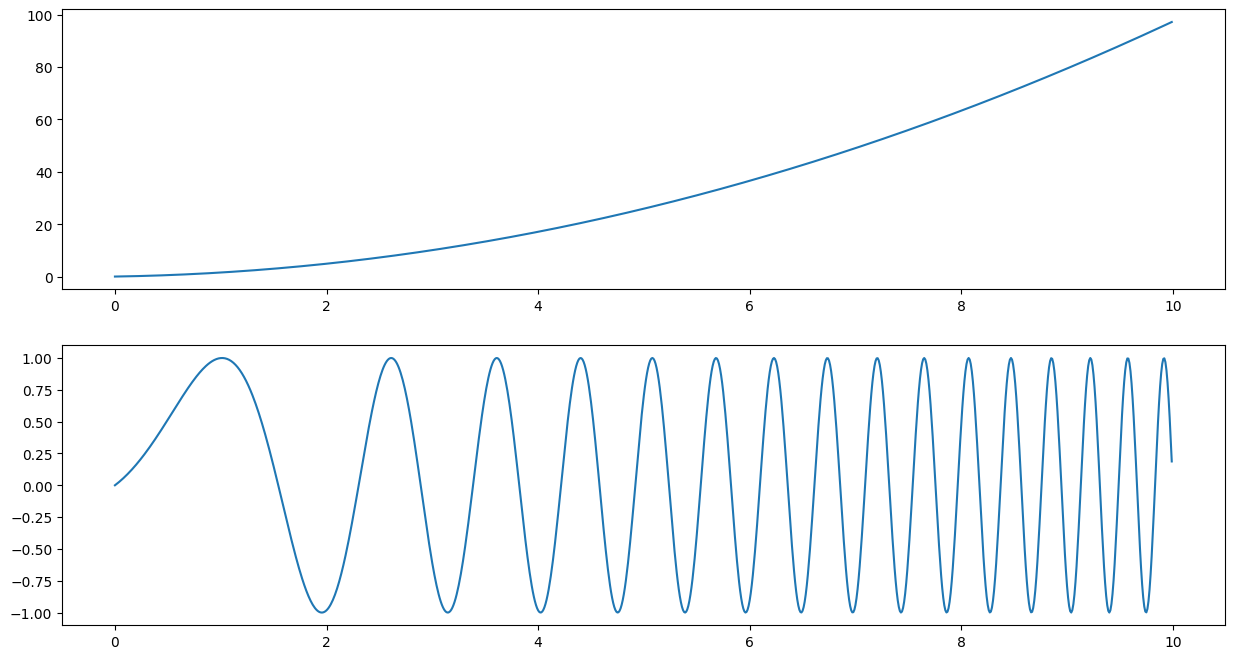

In [5]:
plt.figure(figsize=[15,8])
plt.subplot(2,1,1)
plt.plot(t, phi)
plt.subplot(2,1,2)
plt.plot(t, chirp)

In [6]:
X = []  # input
y = []  # output

n_steps = 100
n_predicts = 1

for i in range(0, 12):
  phi, chirp = chirp_signal(
      T=10,
      freq_start=0.1,
      freq_end=3,
      phi_init=np.pi/3*i,
      t_array=np.arange(0, 10, 0.01)
  )

  for i in range(0, len(chirp) - n_steps - n_predicts):
    X.append(chirp[i:i + n_steps])
    y.append(chirp[i + n_steps])

X = np.array(X)
y = np.array(y)

In [7]:
X.shape

(10788, 100)

In [8]:
# make tensor-like data

X = X.reshape(X.shape[0], X.shape[1], 1)

In [9]:
# make dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2023)


print('Training Shape :', X_train.shape, y_train.shape)
print('Testing Shape :', X_test.shape, y_test.shape)

Training Shape : (8091, 100, 1) (8091,)
Testing Shape : (2697, 100, 1) (2697,)


In [61]:
# make model

model = Sequential()
model.add(LSTM(10, activation='tanh', return_sequences=True))
model.add(LSTM(10, activation='tanh'))
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='adam', loss='mse')


In [62]:
# model training
es = tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=30, restore_best_weights=True)
history = model.fit(X, y, epochs=1000, verbose=0, callbacks = [es])

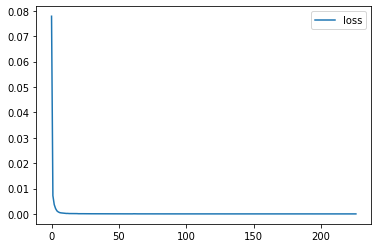

In [63]:
# show history
plt.plot(history.history['loss'], label="loss")
plt.legend(loc="upper right")
plt.show()

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 10)           480       
                                                                 
 lstm_1 (LSTM)               (None, 10)                840       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________


In [12]:
X_valid = []
y_valid = []
phi, chirp = chirp_signal(
    T=10,
    freq_start=0.1,
    freq_end=3,
    phi_init=np.pi/3*0,
    t_array=np.arange(0, 10, 0.01)
)

for i in range(0, len(chirp) - n_steps - n_predicts):
  X_valid.append(chirp[i:i + n_steps])
  y_valid.append(chirp[i + n_steps])

X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1)

2023-02-13 15:48:36.828995: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


29/29 [==============================] - 0s 3ms/step


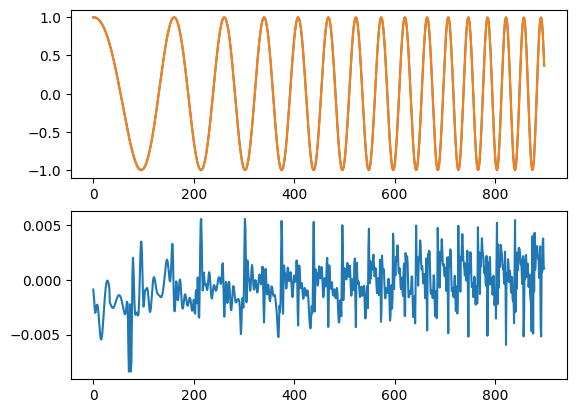

In [13]:
test_y = model.predict(X_valid)

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(y_valid)
plt.plot(test_y)
plt.subplot(2, 1, 2)
plt.plot(test_y.reshape(-1,) - y_valid)
plt.show()

29/29 [==============================] - 0s 4ms/step


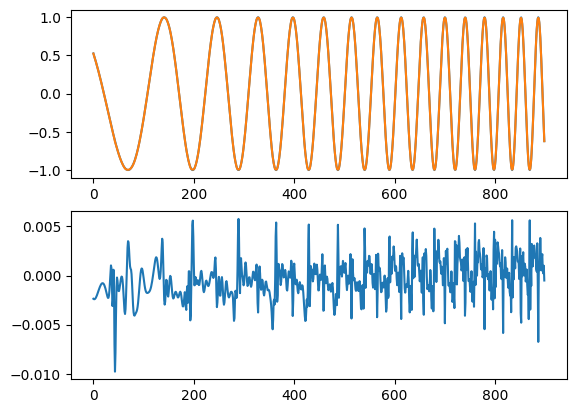

In [14]:
X_valid = []
y_valid = []
phi, chirp = chirp_signal(
    T=10,
    freq_start=0.1,
    freq_end=3,
    phi_init=np.pi/3*1,
    t_array=np.arange(0, 10, 0.01)
)

for i in range(0, len(chirp) - n_steps - n_predicts):
  X_valid.append(chirp[i:i + n_steps])
  y_valid.append(chirp[i + n_steps])

X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1)
test_y = model.predict(X_valid)

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(y_valid)
plt.plot(test_y)
plt.subplot(2, 1, 2)
plt.plot(test_y.reshape(-1,) - y_valid)
plt.show()

29/29 [==============================] - 0s 4ms/step


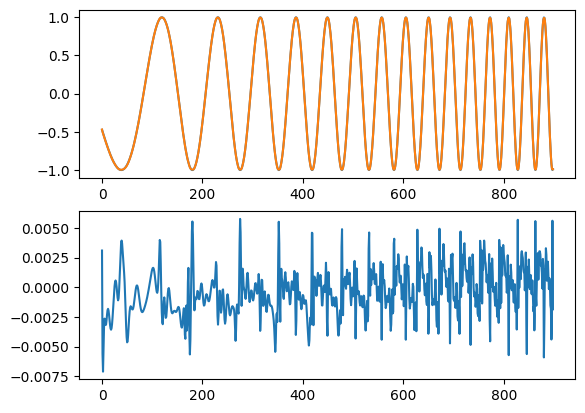

In [15]:
X_valid = []
y_valid = []
phi, chirp = chirp_signal(
    T=10,
    freq_start=0.1,
    freq_end=3,
    phi_init=np.pi/3*2,
    t_array=np.arange(0, 10, 0.01)
)

for i in range(0, len(chirp) - n_steps - n_predicts):
  X_valid.append(chirp[i:i + n_steps])
  y_valid.append(chirp[i + n_steps])

X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1)
test_y = model.predict(X_valid)

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(y_valid)
plt.plot(test_y)
plt.subplot(2, 1, 2)
plt.plot(test_y.reshape(-1,) - y_valid)
plt.show()

29/29 [==============================] - 0s 4ms/step


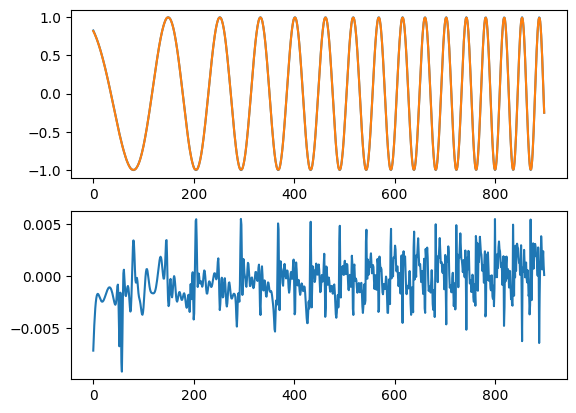

In [16]:
X_valid = []
y_valid = []
phi, chirp = chirp_signal(
    T=10,
    freq_start=0.1,
    freq_end=3,
    phi_init=np.pi/5,
    t_array=np.arange(0, 10, 0.01)
)

for i in range(0, len(chirp) - n_steps - n_predicts):
  X_valid.append(chirp[i:i + n_steps])
  y_valid.append(chirp[i + n_steps])

X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1)
test_y = model.predict(X_valid)

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(y_valid)
plt.plot(test_y)
plt.subplot(2, 1, 2)
plt.plot(test_y.reshape(-1,) - y_valid)
plt.show()

29/29 [==============================] - 0s 4ms/step


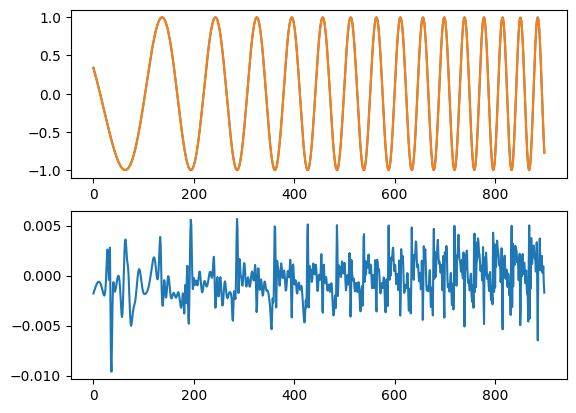

In [17]:
X_valid = []
y_valid = []
phi, chirp = chirp_signal(
    T=10,
    freq_start=0.1,
    freq_end=3,
    phi_init=np.pi/5 * 2,
    t_array=np.arange(0, 10, 0.01)
)

for i in range(0, len(chirp) - n_steps - n_predicts):
  X_valid.append(chirp[i:i + n_steps])
  y_valid.append(chirp[i + n_steps])

X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], 1)
test_y = model.predict(X_valid)

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(y_valid)
plt.plot(test_y)
plt.subplot(2, 1, 2)
plt.plot(test_y.reshape(-1,) - y_valid)
plt.show()

In [10]:
# save model
import os
model_name = 'LSTM_chirp_signal'
model_version = 'layer_10_10'
model_path = os.path.join(os.getcwd().split('notebooks')[0], 'models', model_name, model_version)
print(model_path)
model.save(model_path)

/Users/a12319/PycharmProjects/accidentdetection_lv2/models/LSTM_chirp_signal/layer_10_10


In [11]:
## load model
model = tf.keras.models.load_model(model_path)